### SVM Kernel practical implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])  # horizontal stack
x=np.hstack([x,-x])

In [2]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

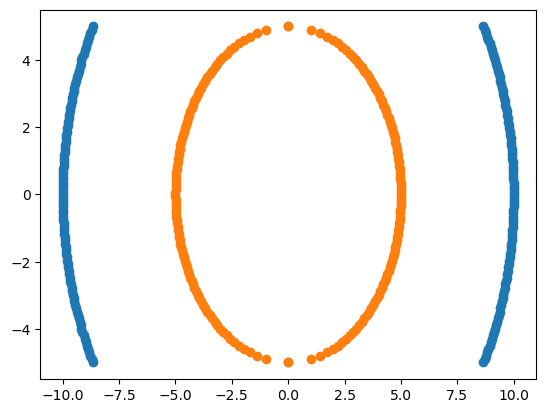

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [7]:
# create 2 dataframe 
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['x1','x2'])
df1['y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['x1','x2'])
df2['y']=1
df=df1.append(df2)
df.head(5)

/tmp/ipykernel_2225/3639878426.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


,x1,x2,y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [8]:
df.tail()

,x1,x2,y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [ ]:
# we have combine both the classes in one dataframe
# reason : so that we can train test split and all operation same as svc 

### Polynomial kernel
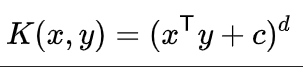

we have to create 3 new feature x2^2 ,x1^2, x1.x2

based on the formula find the components for the polynomial kernel

In [9]:
df['x1_square']=df['x1']**2
df['x2_square']=df['x2']**2
df['x1*x2']=df['x1']*df['x2']

In [10]:
df.head()   # components of polynomial kernel (we have made 2d from 1d)

,x1,x2,y,x1_square,x2_square,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [12]:
# create independent and dependent features 
x=df[['x1_square','x2_square','x1*x2']]
y=df[['y']]  # use linear svc to create best fit line 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
x_train.head()

,x1_square,x2_square,x1*x2
50,24.997449,0.002551,0.252512
63,98.140496,1.859504,13.508984
112,10.651974,14.348026,-12.362637
159,99.079176,0.920824,9.551676
83,13.549638,11.450362,12.455852


In [20]:
# we use plotly to make 3-d scatter plot 
import plotly.express as px

In [26]:
fig=px.scatter_3d(df,x='x1_square',y='x2_square',z='x1*x2',color='y')
fig.show()

In [ ]:
# our 2-d graph got converted to 3-d graph

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [29]:
classifier=SVC(kernel='linear')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)  # accuracy is comes out to be 1

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



1.0

In [ ]:
# Accuracy is 1 because there is a clear separation between the both datapoints no overlappping is there 
# in svc we have kernel parameter that will perform all this task for ourself (no need to do manually)

### Radial Basis Function Kernel 

In [30]:
# independent and dependent feature (here we will take the given datasets)
x=df.iloc[:,0:2]
y=df.y

In [31]:
x.head()

,x1,x2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [33]:
# this rbf will internally create the components then transfrom into higher dimension and then create a best fit plane & margin
classifier=SVC(kernel='rbf')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)  # accuracy comes out to be 1 (no overlapping datapoints)

1.0

### Sigmoidal kernel 
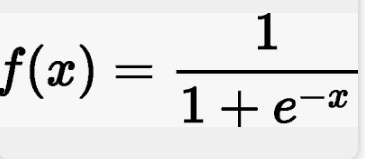

In [35]:
classifier=SVC(kernel='sigmoid')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)  # accuracy comes out to be 0.51 
# accuracy is very low this means this data is not suitable for sigmoidal

0.51